In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
Data = pd.read_csv('/content/drive/MyDrive/Working Space/Data_coffee/Data_coffee_complete.csv')
Data

,field1,Name,NewCode,code,Groupping,Sweetness,L,A,B,density,...,histidine,arginine,valine,metheonine,tyrosine,isoleucine,leucine,phynylalanine,Tryptophan,adenosine
0,0,DC1,DC8001-1,F1,1,17.5,44.83,0.45,11.11,0.67,...,26.76,136.15,60.93,12.10,40.74,39.18,52.01,61.76,185.23,46.94
1,1,DC1,DC8001-2,F1,1,17.5,44.83,0.45,11.11,0.67,...,26.76,136.15,60.93,12.10,40.74,39.18,52.01,61.76,185.23,46.94
2,2,DC1,DC8001-3,F1,1,17.5,44.83,0.45,11.11,0.67,...,26.76,136.15,60.93,12.10,40.74,39.18,52.01,61.76,185.23,46.94
3,3,DC1,DC8001-4,F1,1,17.5,44.83,0.45,11.11,0.67,...,26.76,136.15,60.93,12.10,40.74,39.18,52.01,61.76,185.23,46.94
4,4,DC1,DC8001-5,F1,1,17.5,44.83,0.45,11.11,0.67,...,26.76,136.15,60.93,12.10,40.74,39.18,52.01,61.76,185.23,46.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,221,BK1,BK-10001-2,F48,6,15.0,49.48,1.25,11.67,0.68,...,37.02,381.68,71.67,13.42,40.63,45.78,74.05,152.09,312.51,72.94
65,222,BK1,BK-10001-3,F48,6,15.0,49.48,1.25,11.67,0.68,...,37.02,381.68,71.67,13.42,40.63,45.78,74.05,152.09,312.51,72.94
66,225,BK3,BK-10003-1,F50,6,17.0,52.42,0.81,12.40,0.68,...,52.47,295.35,72.70,13.85,42.27,46.86,68.86,139.61,329.48,50.20
67,226,BK3,BK-10003-2,F50,6,17.0,52.42,0.81,12.40,0.68,...,52.47,295.35,72.70,13.85,42.27,46.86,68.86,139.61,329.48,50.20


In [5]:
feature =['L','A','B','density']
feature

['L', 'A', 'B', 'density']

In [6]:
feature_corr = Data[feature].corr()
feature_uncorr = feature_corr.style.applymap(lambda e: 'background-color: yellow' if np.abs(e) <= 0.05 else 'background-color: white')
feature_uncorr

,L,A,B,density
L,1.000000,0.736782,0.855970,0.246470
A,0.736782,1.000000,0.548732,0.298554
B,0.855970,0.548732,1.000000,0.315453
density,0.246470,0.298554,0.315453,1.000000


In [7]:
X = Data[feature]
scaler = StandardScaler()
X_t = scaler.fit_transform(X)

In [8]:
pca = PCA(n_components=X_t.shape[1])

pca.fit_transform(X_t)
print(f'explained_variance (n_components={pca.n_components}) = {pca.explained_variance_}') # Eigenvalues
print(f'explained_variance_ratio (n_components={pca.n_components}) = {pca.explained_variance_ratio_}')
print(f'sum explained_variance_ratio = {np.sum(pca.explained_variance_ratio_)}')

explained_variance (n_components=4) = [2.62667192 0.86610572 0.46880631 0.09723958]
explained_variance_ratio (n_components=4) = [0.64715105 0.21338837 0.115503   0.02395758]
sum explained_variance_ratio = 0.9999999999999999


In [9]:
def scree_plot(X, n_components, with_cumulative=False, show_data_label=False, figsize=(10, 7)):
    '''
    PCA scree plot with cumulative
    '''
    scaler = StandardScaler()
    X_t=scaler.fit_transform(X)

    max_components = min(X.shape)
    x=np.arange(1, n_components+1)
    pca = PCA(n_components=max_components)
    pca.fit_transform(X_t)
    y1=pca.explained_variance_ratio_[:n_components]
    y2=np.cumsum(pca.explained_variance_ratio_)[:n_components]
    
    plt.figure(figsize=figsize)
    
    if n_components > 20:
        marker = None
    else:
        marker = 'o'
    if with_cumulative:
        plt.plot(x, y2, linestyle='--', marker=marker, label='cumulative', color='salmon')
        
    plt.plot(x, y1, linestyle='-', marker=marker, label='individual', color='deepskyblue')
    plt.title('explained variance ratio')
    plt.xlabel('# of components')
    plt.ylabel('proportion of variance explained')
    plt.legend()
    if with_cumulative:
        [plt.axhline(y=xl, color='.7', linestyle='--') for xl in [.8, .9, .95, 1]]
    plt.grid(axis='x')

    if show_data_label:
        for n, v, cv in zip(np.nditer(x, flags=['refs_ok']), 
                            np.nditer(y1, flags=['refs_ok']),
                            np.nditer(y2, flags=['refs_ok'])):
                plt.text(n+.02, v+.02, f'{v*100:.2f}%', fontsize=10)
                if with_cumulative:
                    plt.text(n+.02, cv+.02, f'{cv*100:.2f}%', fontsize=10)

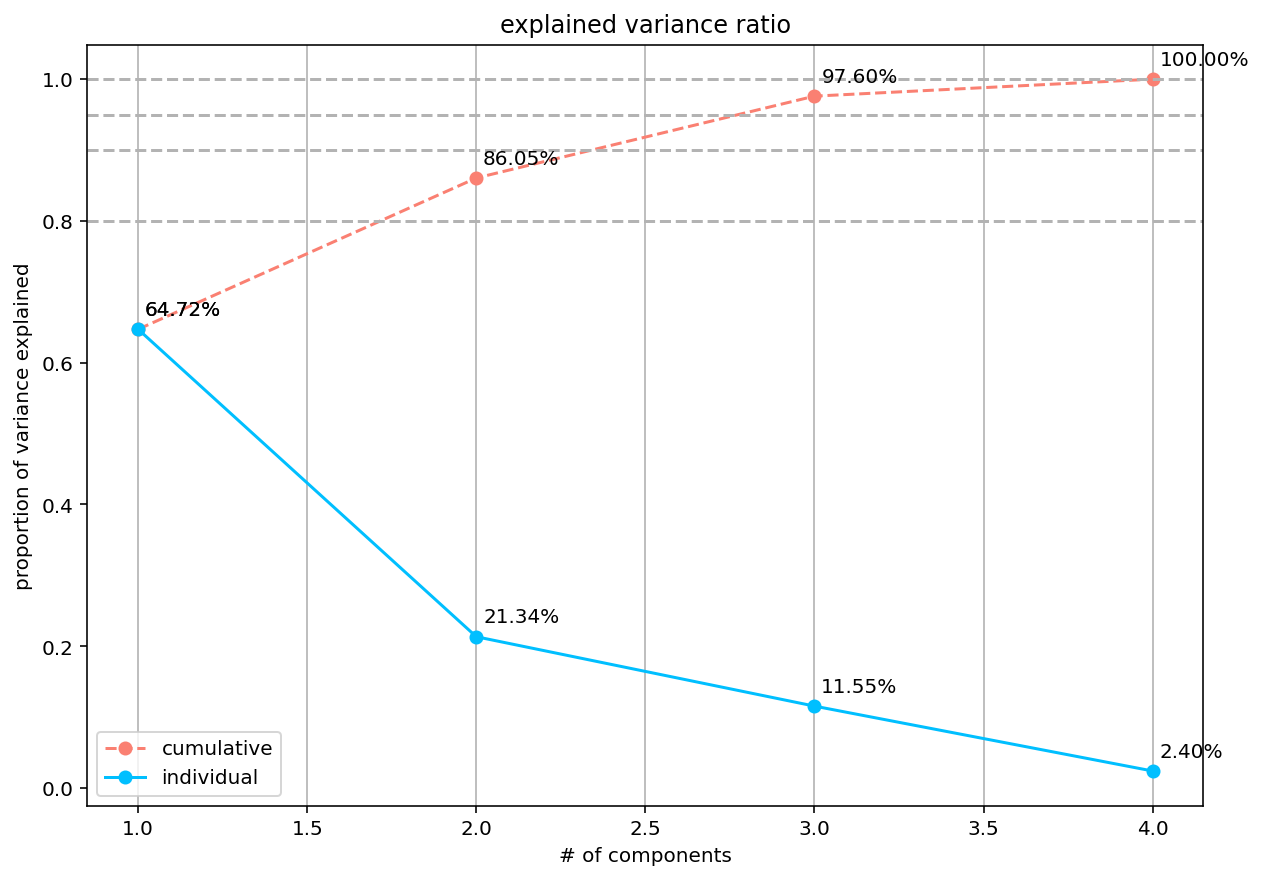

In [10]:
scree_plot(X, 4, True, True)

In [11]:
dpc=pd.DataFrame(pca.components_.T, 
                  index=Data[feature].columns,
                  columns=[f'PC{n+1}' for n in range(pca.components_.shape[0])]).round(4) #Eigenvectors
# dpc
dpc.style.applymap(lambda e: 'background-color: yellow' if np.abs(e) > .5 else 'background-color: white')

,PC1,PC2,PC3,PC4
L,0.583100,0.259900,0.120300,-0.760200
A,0.516900,0.103100,-0.792700,0.306300
B,0.551800,0.140200,0.596600,0.565600
density,0.297200,-0.949800,0.034900,-0.091300


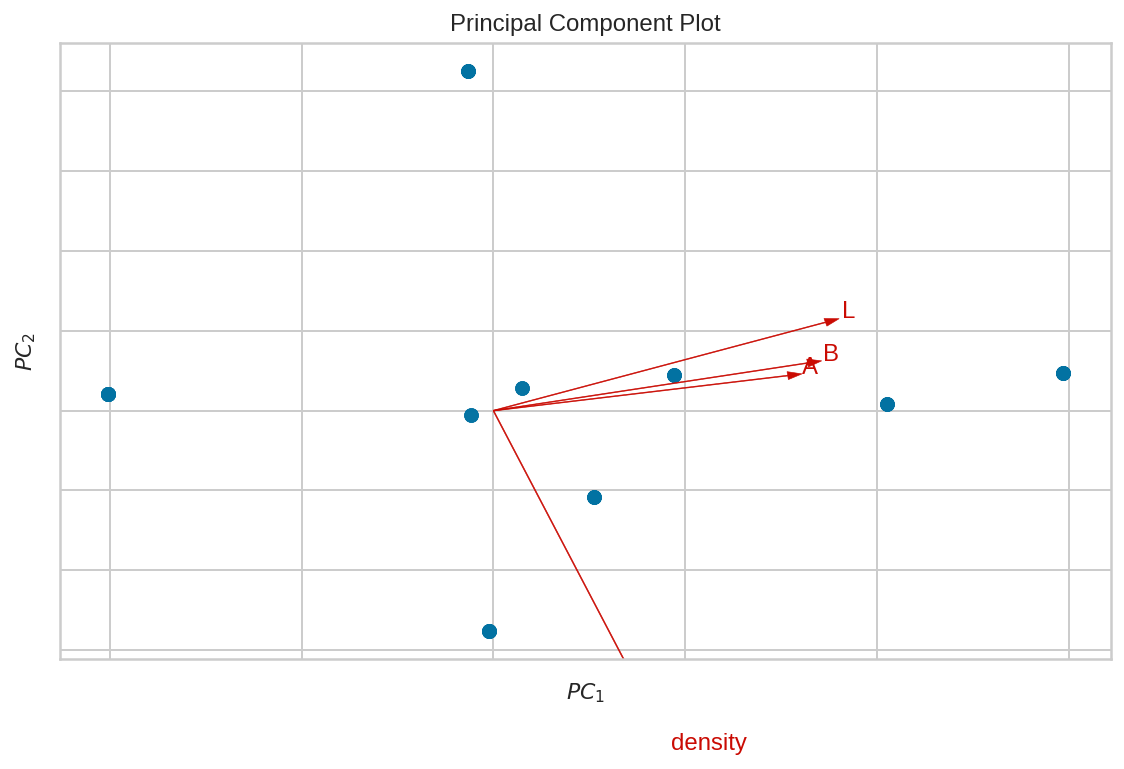

In [12]:
import yellowbrick.features as yb
visualizer = yb.PCA(scale=True, proj_features=True, proj_dim=2)
visualizer.fit_transform(X)
visualizer.show()

In [13]:
pca1 = PCA(n_components= 2)
components = pca1.fit_transform(X_t)
fig = px.scatter(components, x = 0, y = 1, color = Data['Groupping'])
fig.show()

In [14]:
pca = PCA(n_components=2)

X_pca=pca.fit_transform(X_t)

X_pca

array([[-2.01148722,  0.10611456],
       [-2.01148722,  0.10611456],
       [-2.01148722,  0.10611456],
       [-2.01148722,  0.10611456],
       [-2.01148722,  0.10611456],
       [-2.01148722,  0.10611456],
       [-2.01148722,  0.10611456],
       [-2.01148722,  0.10611456],
       [-2.01148722,  0.10611456],
       [-2.01148722,  0.10611456],
       [-2.01148722,  0.10611456],
       [-2.01148722,  0.10611456],
       [-2.01148722,  0.10611456],
       [-2.01148722,  0.10611456],
       [-2.01148722,  0.10611456],
       [-2.01148722,  0.10611456],
       [-2.01148722,  0.10611456],
       [-2.01148722,  0.10611456],
       [-2.01148722,  0.10611456],
       [-2.01148722,  0.10611456],
       [-0.02372192, -1.37820338],
       [-0.02372192, -1.37820338],
       [-0.02372192, -1.37820338],
       [-0.02372192, -1.37820338],
       [-0.02372192, -1.37820338],
       [-0.02372192, -1.37820338],
       [-0.02372192, -1.37820338],
       [-0.02372192, -1.37820338],
       [-0.02372192,

In [15]:
dd=pd.concat([pd.DataFrame(pca.transform(X_t), 
                           columns=[f'PC{n}' for n in range(1, pca.n_components_ + 1)]), 
              Data[['Groupping']]], axis = 'columns')

dd

,PC1,PC2,Groupping
0,-2.011487,0.106115,1
1,-2.011487,0.106115,1
2,-2.011487,0.106115,1
3,-2.011487,0.106115,1
4,-2.011487,0.106115,1
...,...,...,...
64,-0.117079,-0.024690,6
65,-0.117079,-0.024690,6
66,0.147408,0.143899,6
67,0.147408,0.143899,6


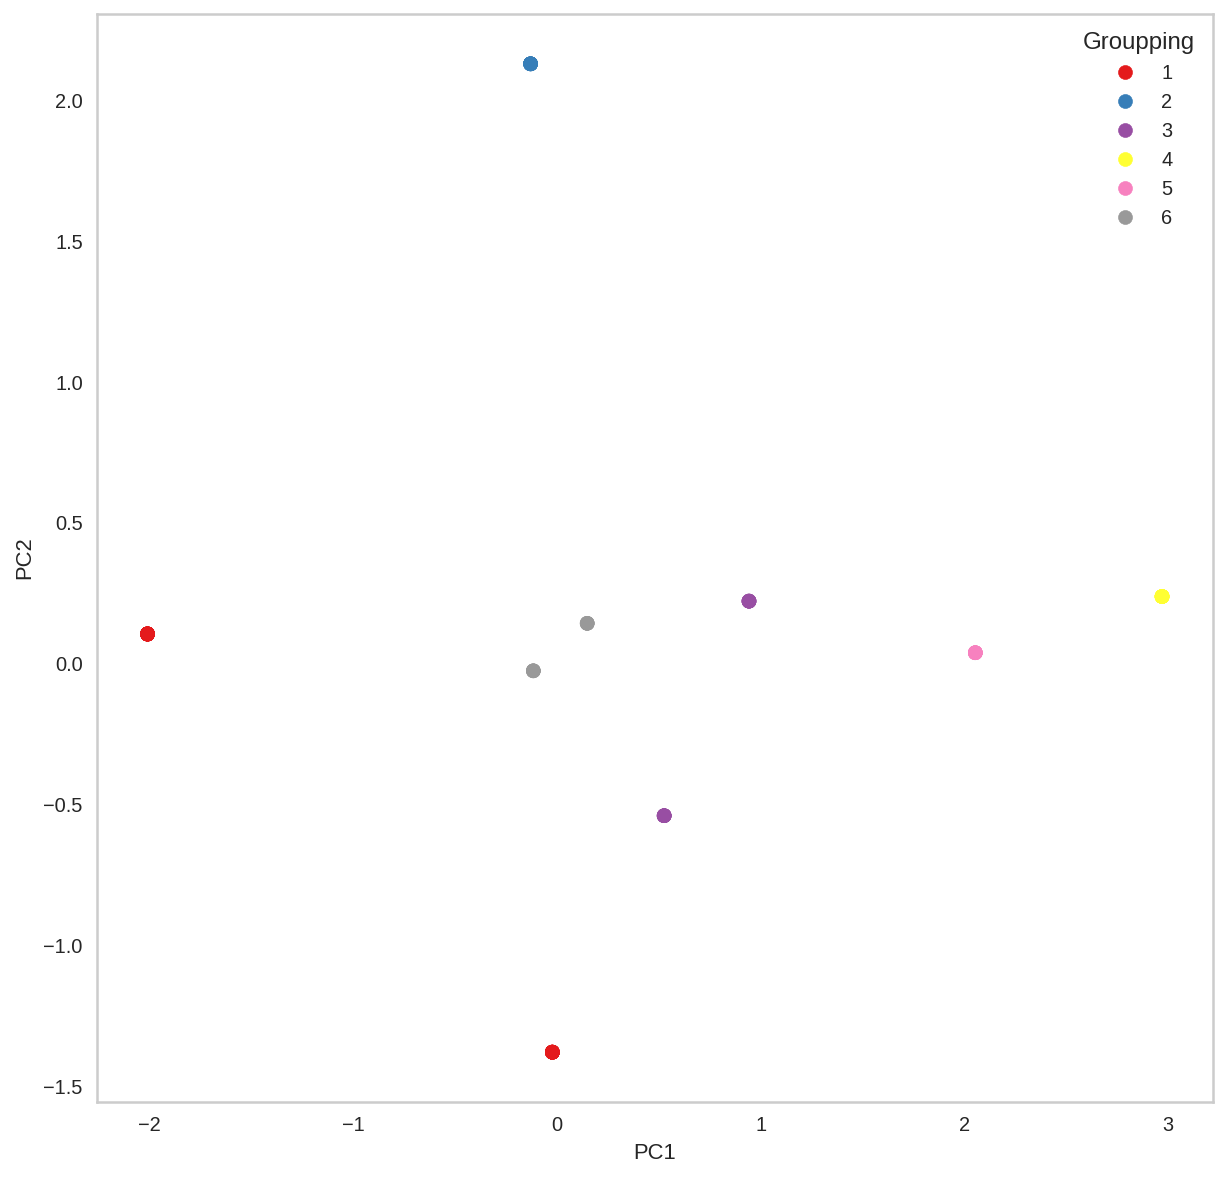

In [16]:
plt.figure(figsize=(10,10))
scatter = plt.scatter(dd['PC1'],dd['PC2'],cmap='Set1', c=Data.Groupping.astype('category').cat.codes)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(b=None)
plt.legend(handles=scatter.legend_elements()[0], 
           labels = ['1','2','3','4','5','6'],
           title = "Groupping")
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm

In [24]:
X = dd.iloc[:,0:2]
y = dd.Groupping
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.33, random_state = 42)

In [25]:
linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(X_train, y_train)
rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo').fit(X_train, y_train)
sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(X_train, y_train)

In [26]:
#to better understand it, just play with the value, change it and print it
h = .01
#create the mesh
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
# create the title that will be shown on the plot
titles = ['Linear kernel','RBF kernel','Polynomial kernel','Sigmoid kernel']

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names



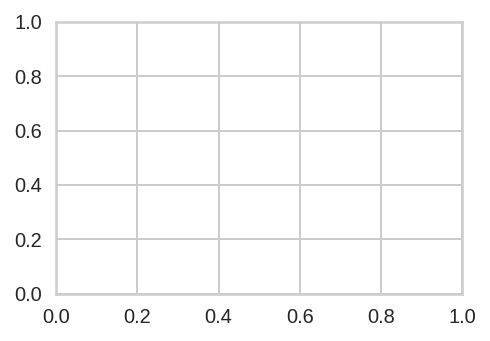

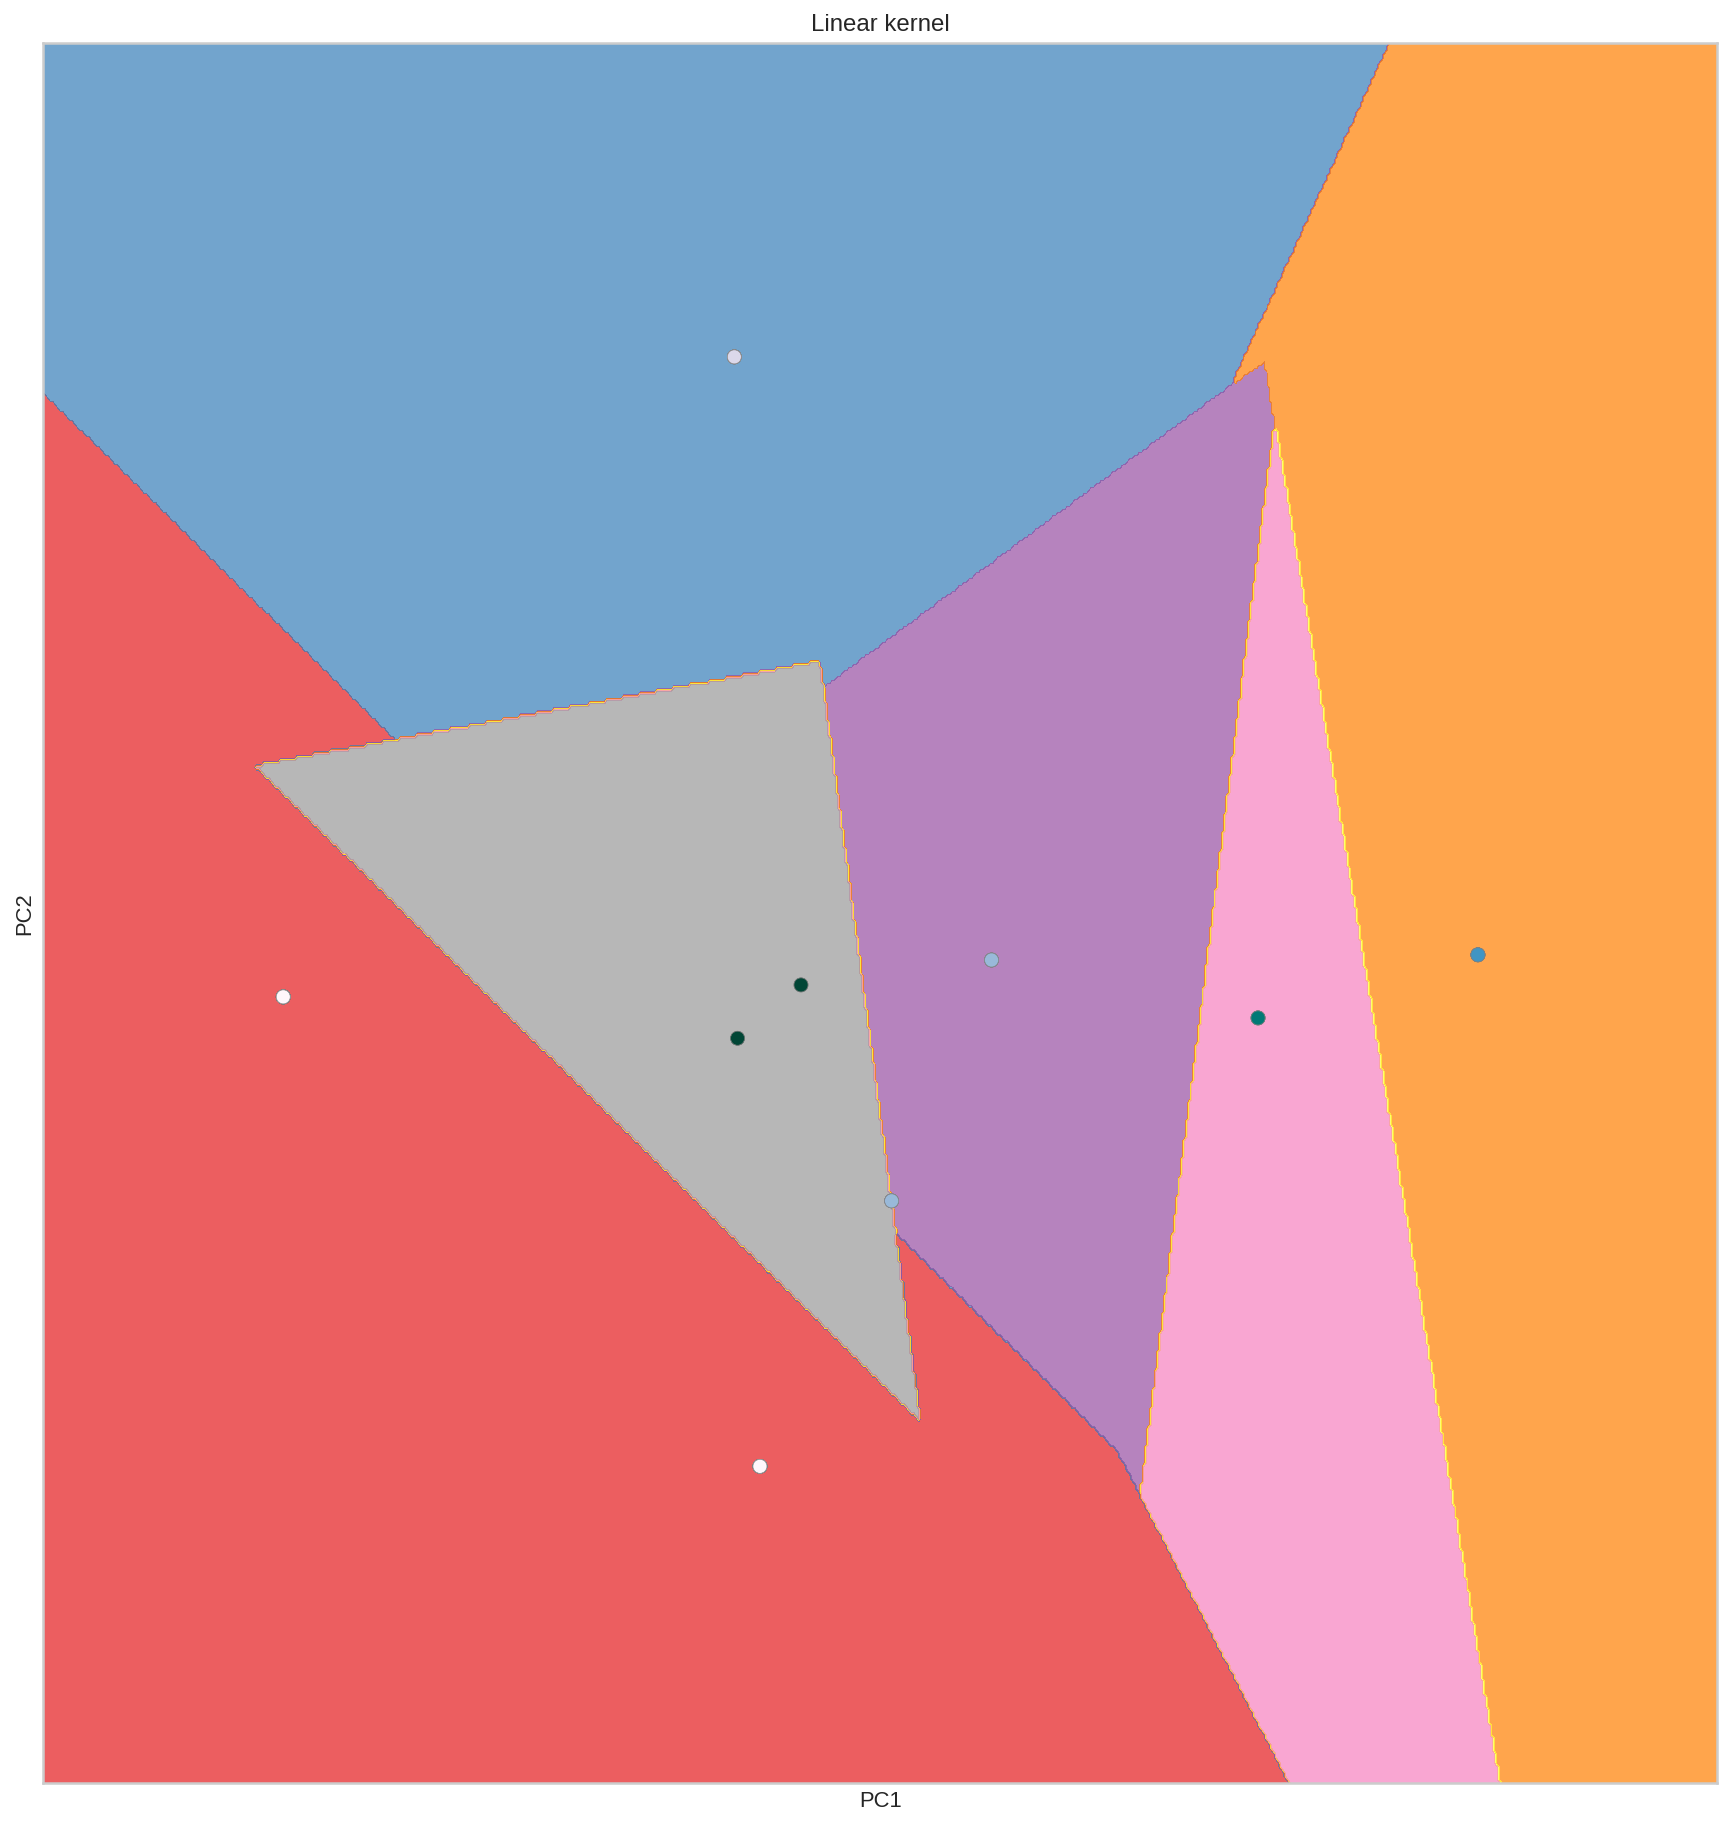

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names



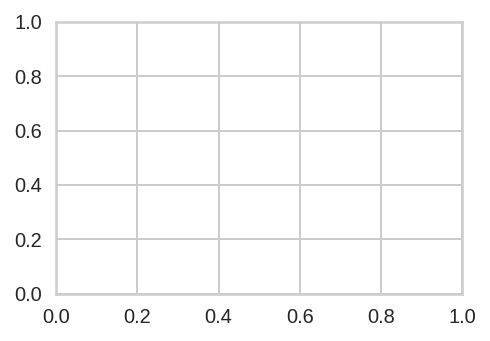

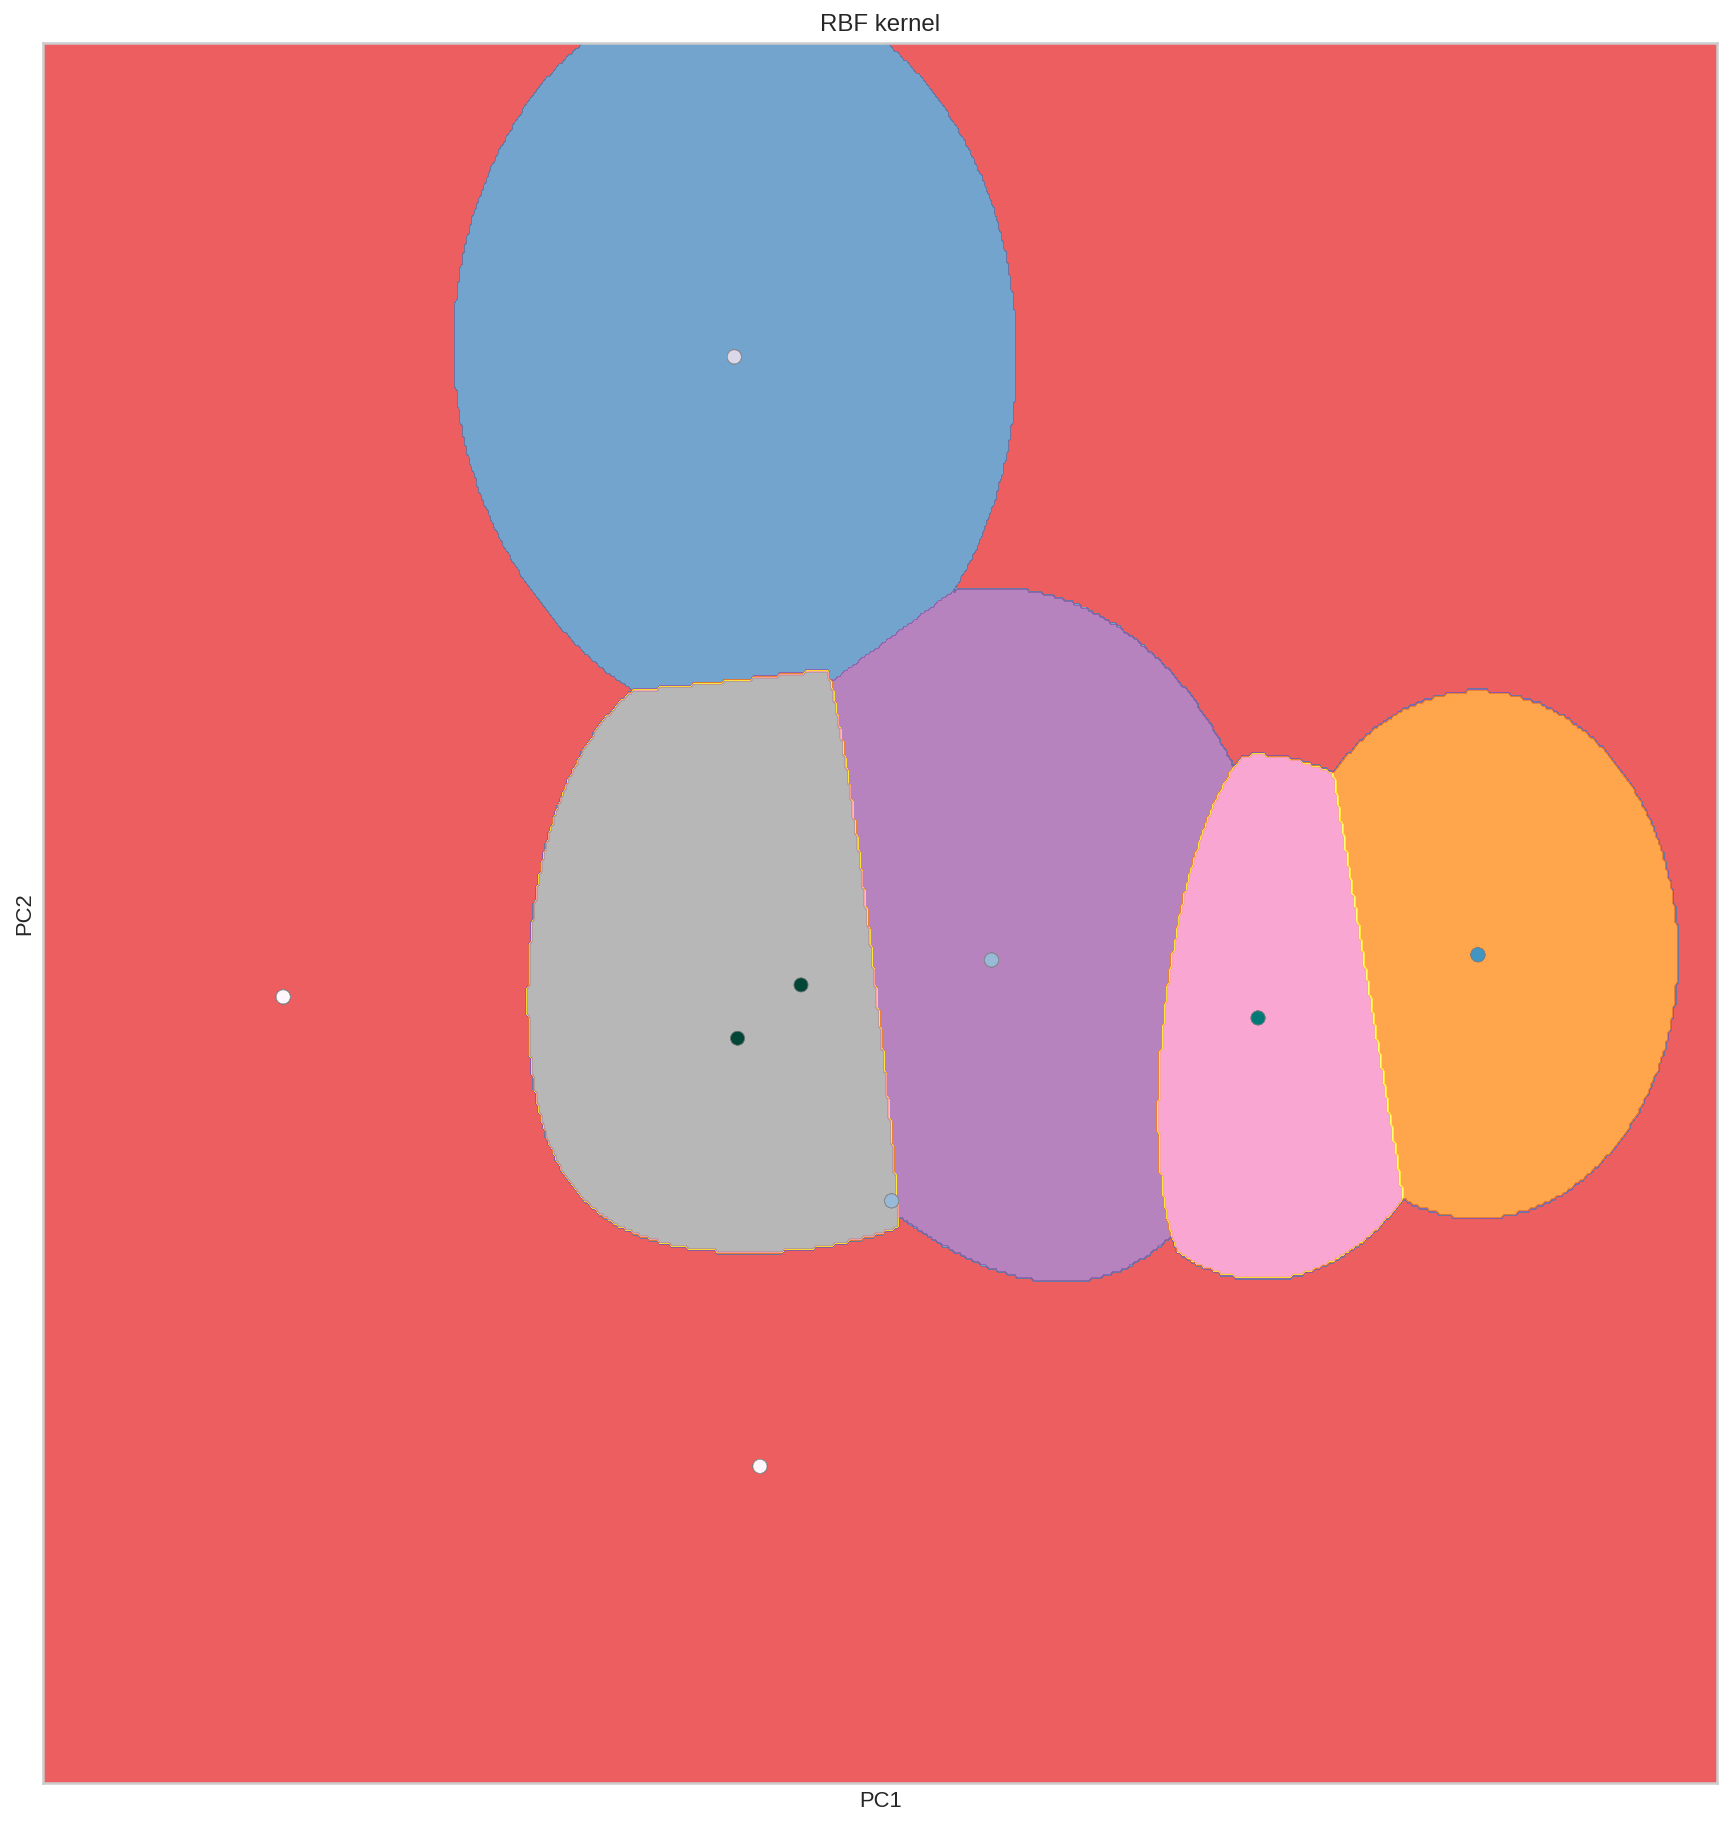

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names



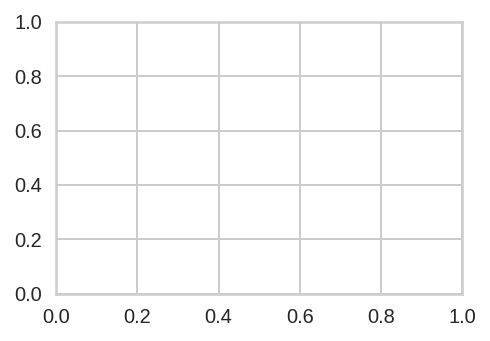

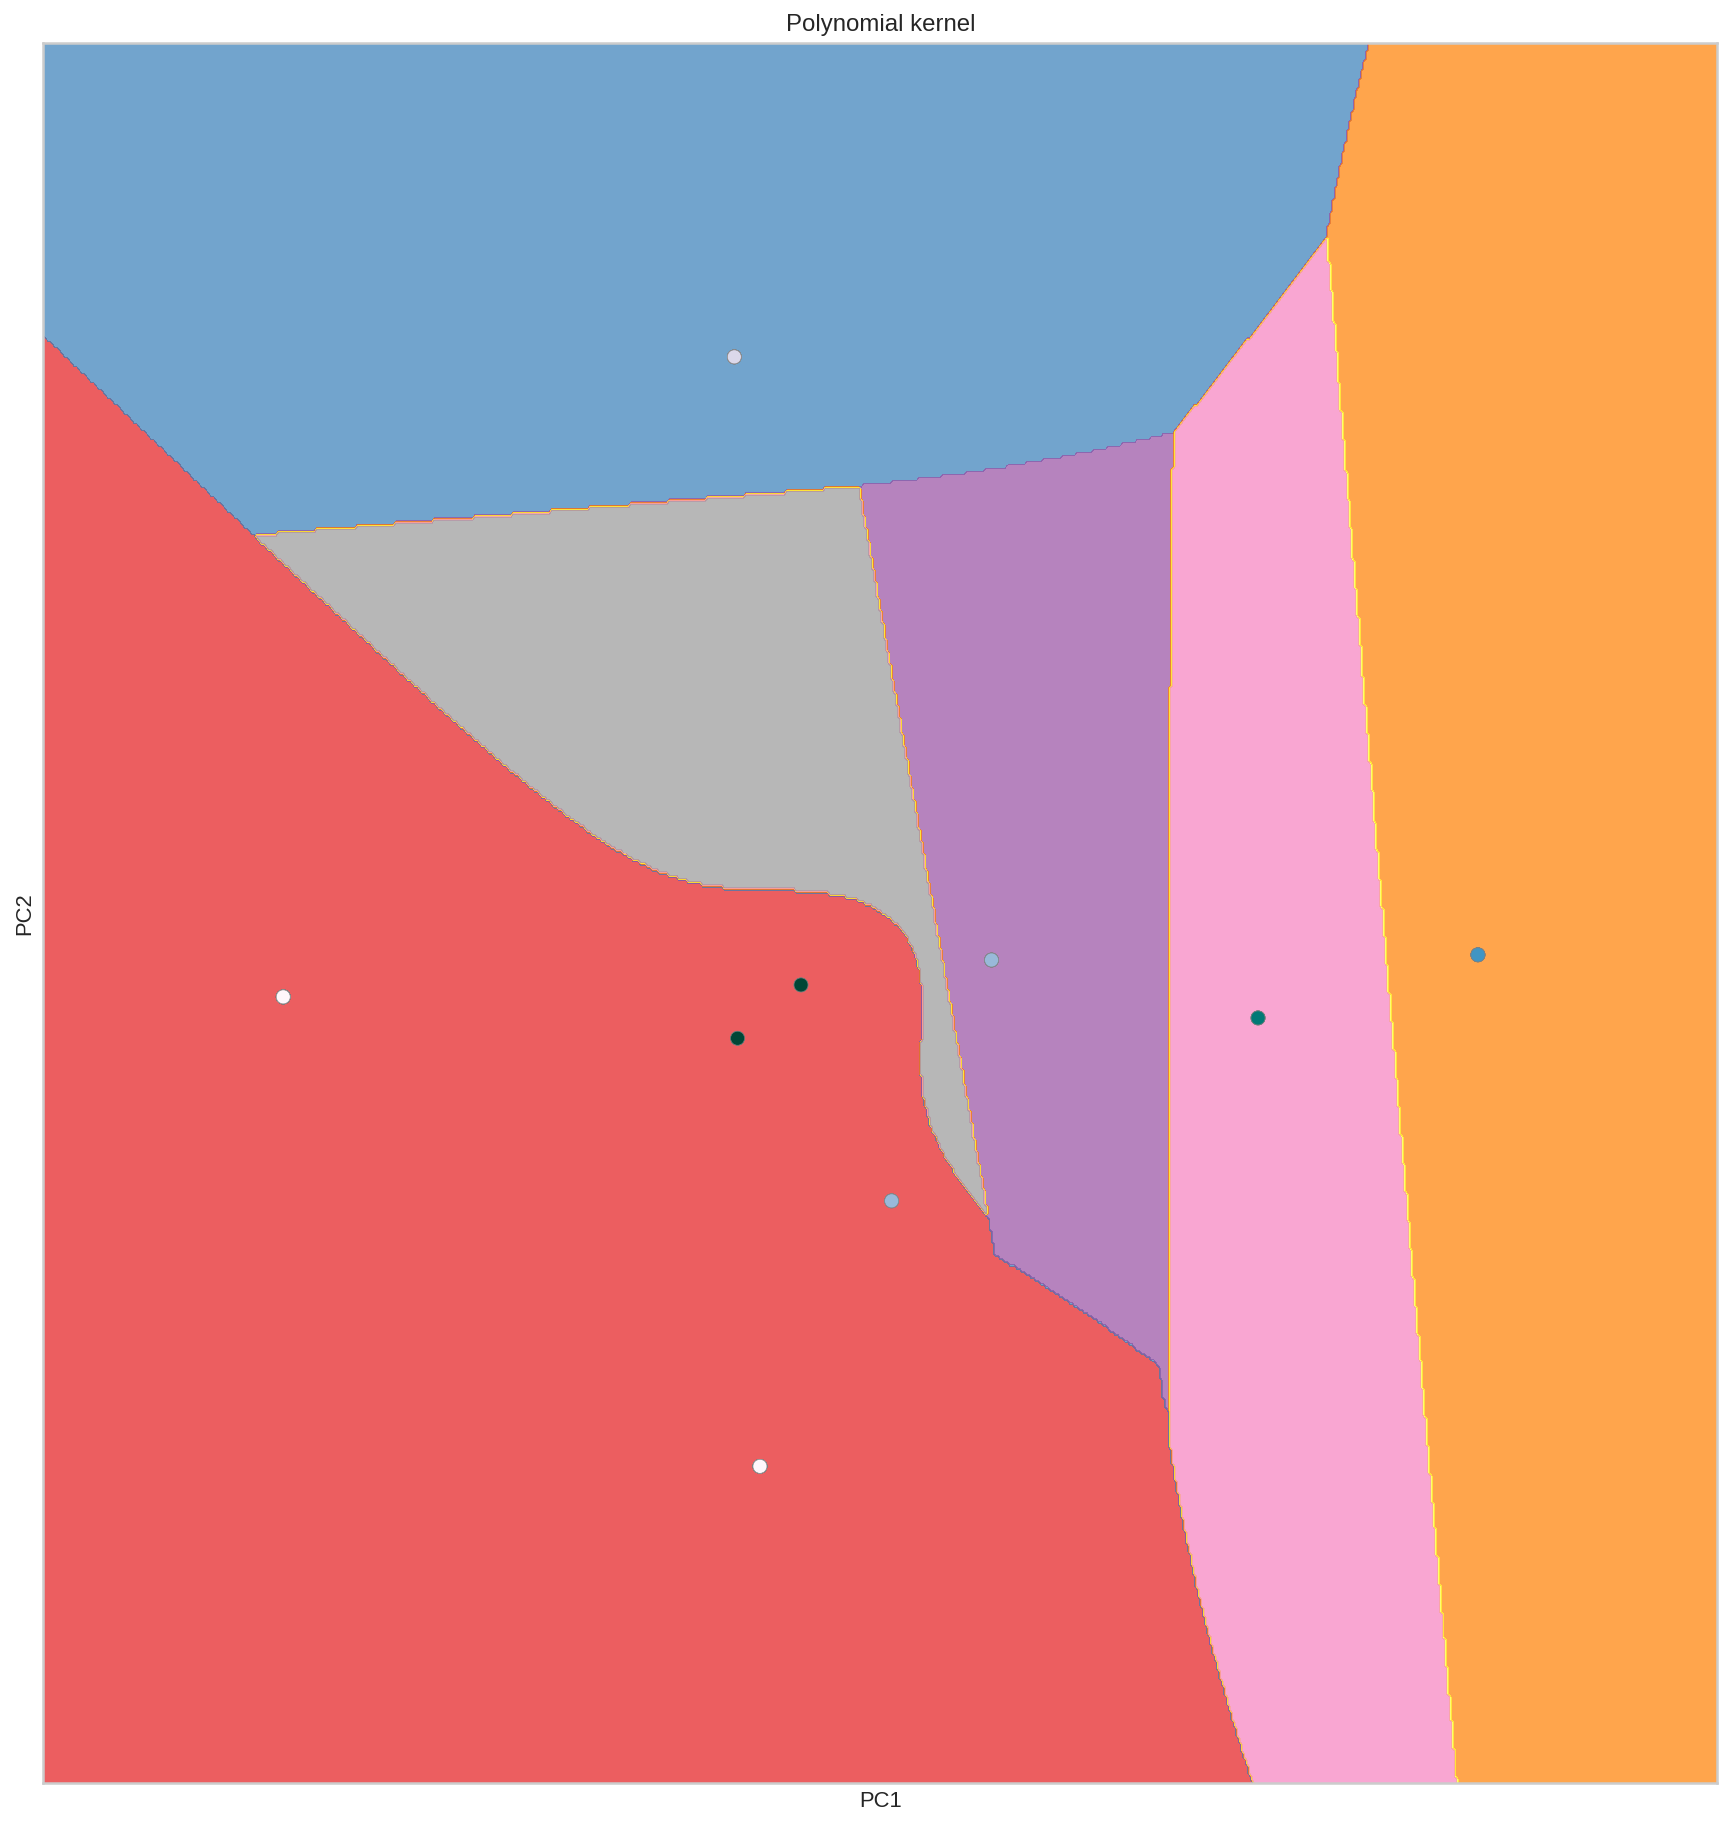

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names



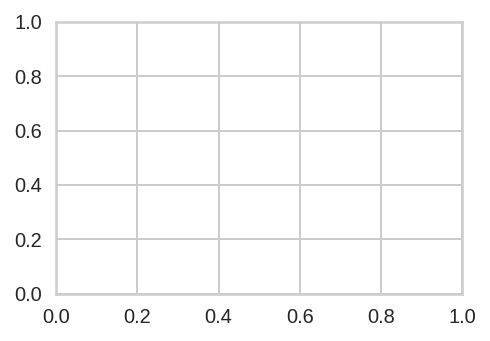

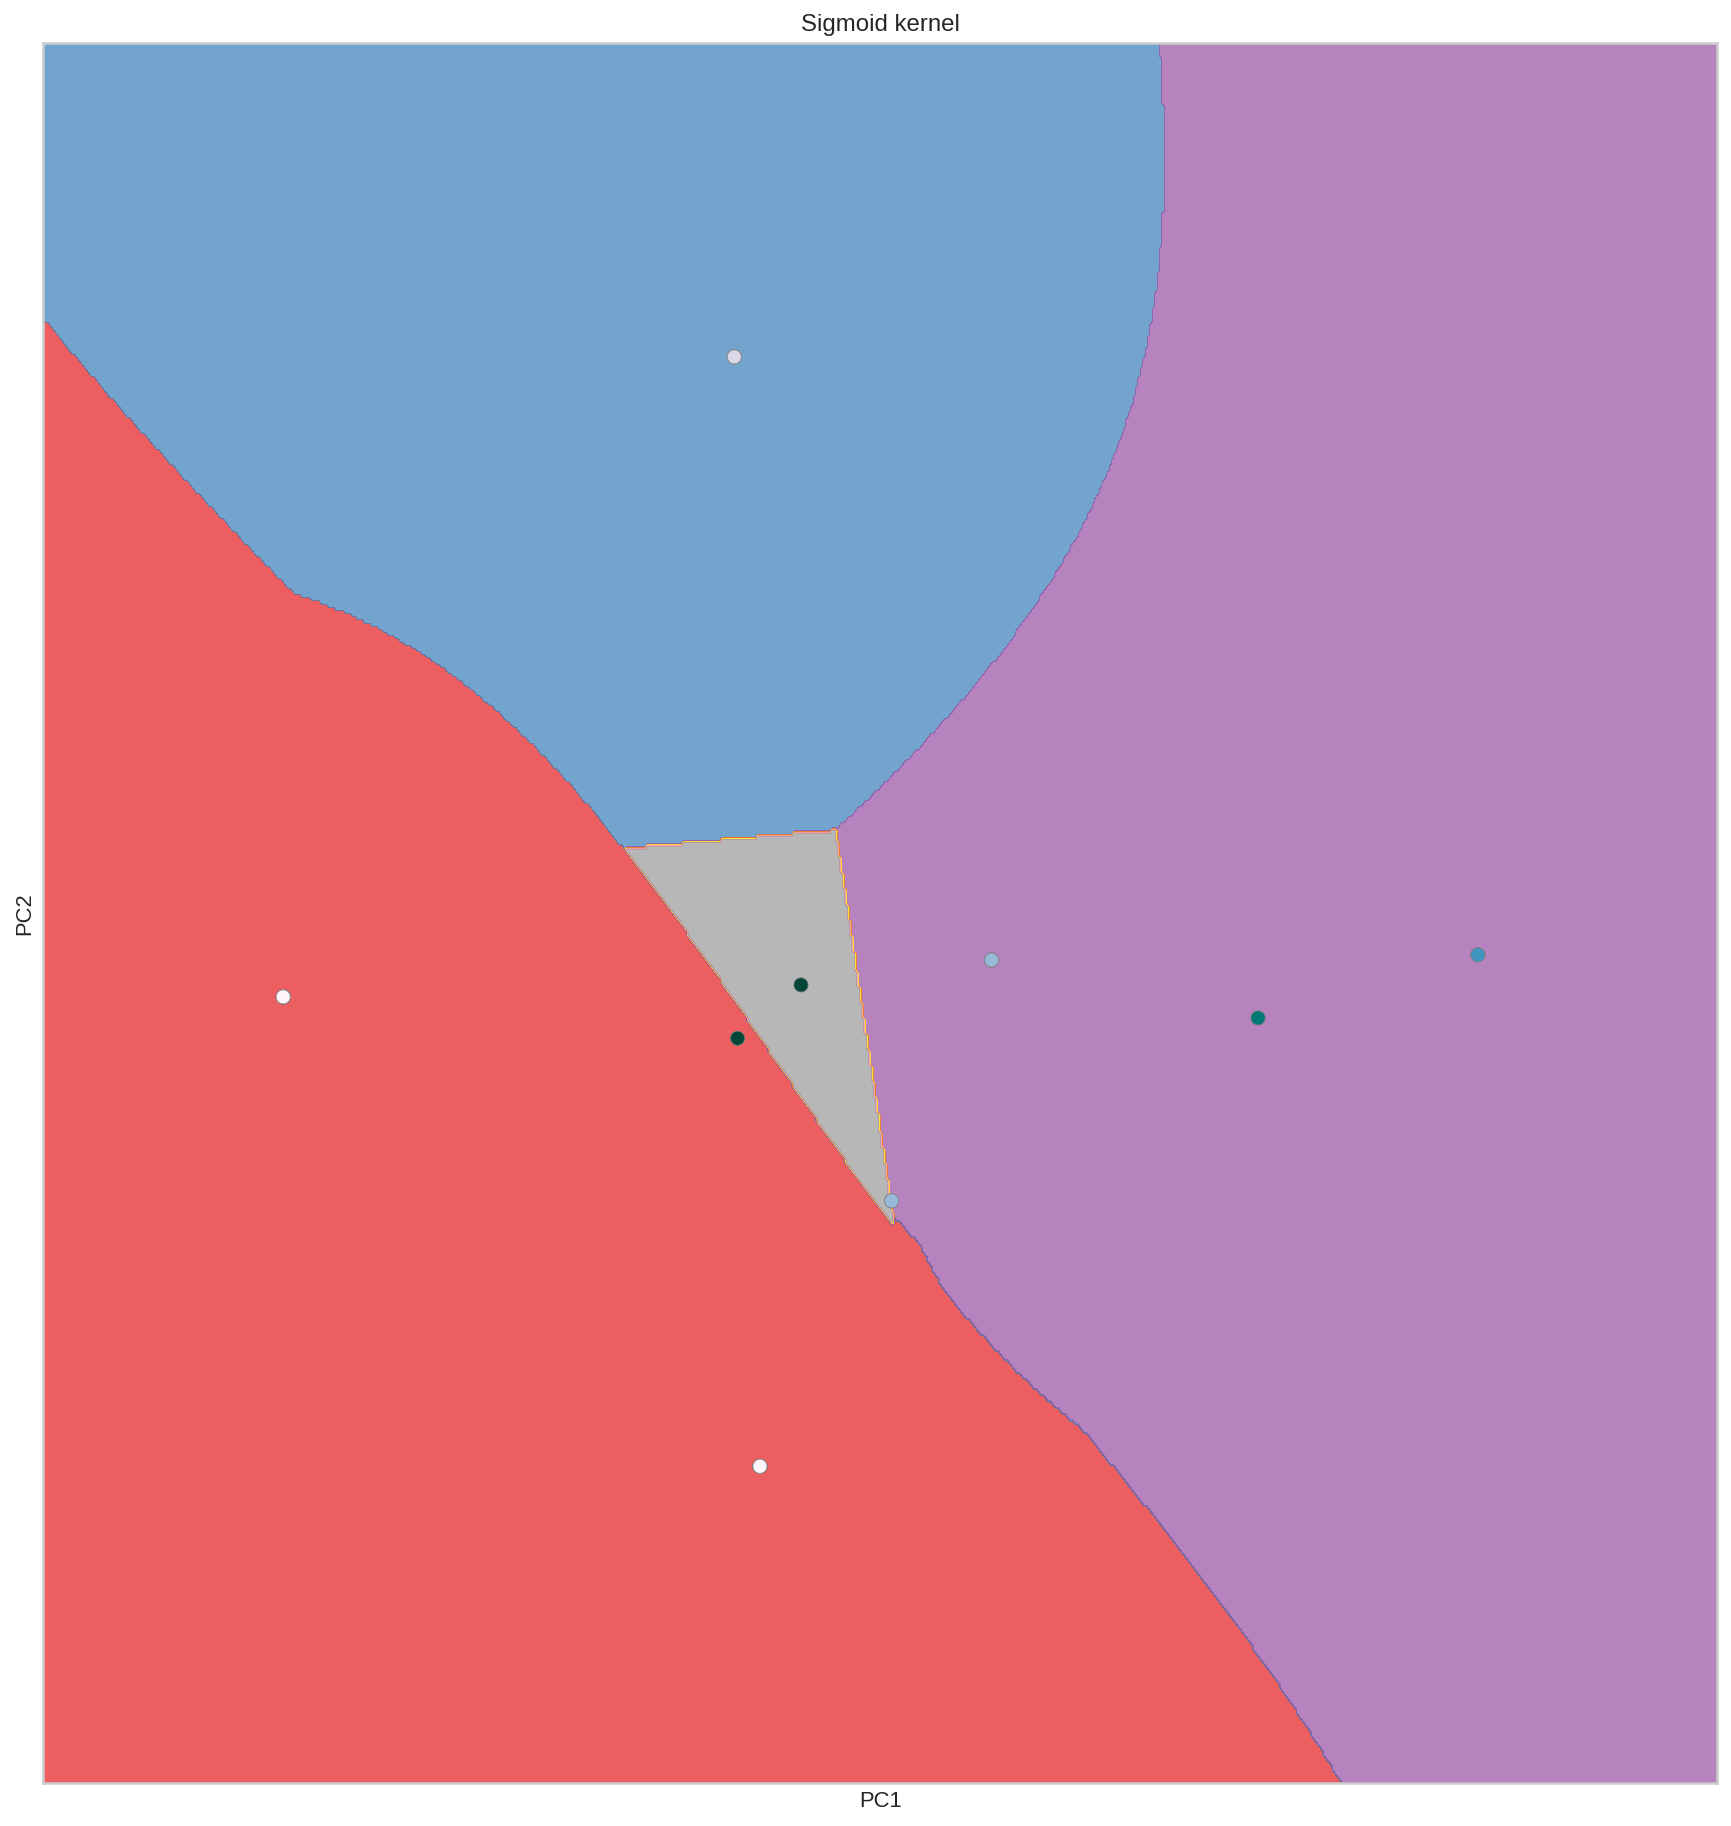

In [27]:
for i, clf in enumerate((linear, rbf, poly, sig)):
    plt.subplot(2, 2, i + 1) #i+1 is the index
    plt.figure(figsize=(15,16))
    #space between plots
    plt.subplots_adjust(wspace=0.4, hspace=0.4) 
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Set1, alpha=0.7)
    # Plot also the training points
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.PuBuGn,edgecolors='grey')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
    plt.show()

In [28]:
linear_pred = linear.predict(X_test)
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)
sig_pred = sig.predict(X_test)

In [29]:
accuracy_lin = linear.score(X_test, y_test)
accuracy_poly = poly.score(X_test, y_test)
accuracy_rbf = rbf.score(X_test, y_test)
accuracy_sig = sig.score(X_test, y_test)
print('Linear Kernel:', accuracy_lin)
print('Polynomial Kernel:', accuracy_poly)
print('Radial Basis Kernel:', accuracy_rbf)
print('Sigmoid Kernel:', accuracy_sig)

Linear Kernel: 1.0
Polynomial Kernel: 0.8297872340425532
Radial Basis Kernel: 0.8936170212765957
Sigmoid Kernel: 0.7446808510638298
